In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import AllChem
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint 
from scipy.stats import uniform 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

% matplotlib inline
#inspired by https://github.com/rdkit/rdkit-tutorials/blob/master/notebooks/005_Chemical_space_analysis_and_visualization.ipynb

In [33]:
df = pd.read_csv("BBBP.csv")
molec = {}

RDKit ERROR: [10:04:28] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [10:04:28] Explicit valence for atom # 5 N, 4, is greater than permitted


,num,name,p_np,smiles,ROMol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO3)=O,
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)[C@@H](N4C3=O)C(O)=O,

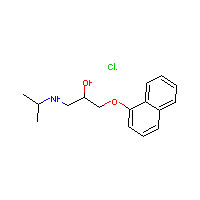
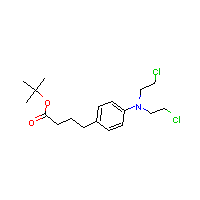
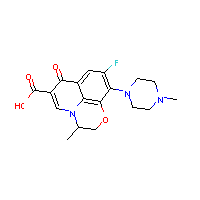
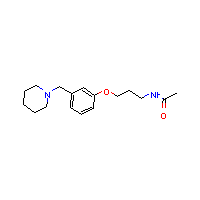
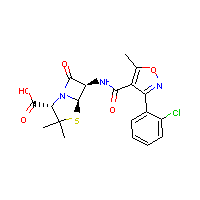

In [34]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
df = df[~df['ROMol'].isnull()]
df.head()

In [35]:
def get_fingerprint(mol, radius=2, nBits=1024, dtype=np.float32, useFeatures=False):
    arr = np.zeros((1,), dtype)
    DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return arr
    

,num,name,p_np,smiles,ROMol,FP
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO3)=O,,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...]"
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,,"[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)[C@@H](N4C3=O)C(O)=O,,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]"

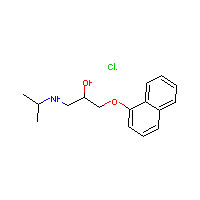
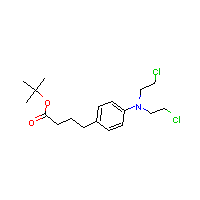
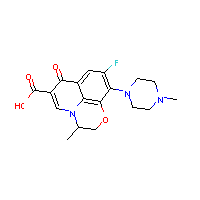
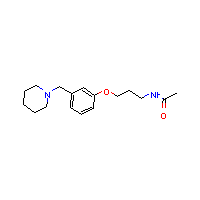
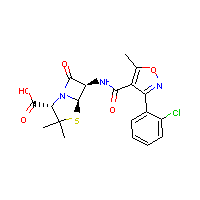

In [36]:
df['FP'] = df['ROMol'].map(get_fingerprint)
df.head()

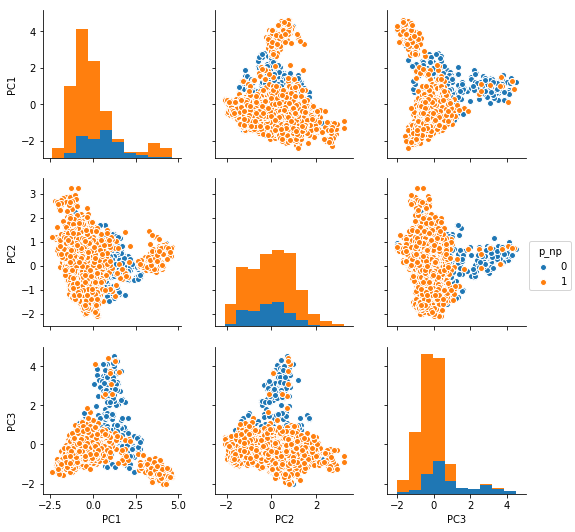

In [37]:
X = np.array([x for x in df['FP']])
pca = PCA(n_components=3, random_state=0)
pca_BBBP = pca.fit_transform(X)
df['PC1'] = pca_BBBP.T[0]
df['PC2'] = pca_BBBP.T[1]
df['PC3'] = pca_BBBP.T[2]
sns.pairplot(df, hue='p_np', vars=['PC1', 'PC2', 'PC3']); #go with this one as final


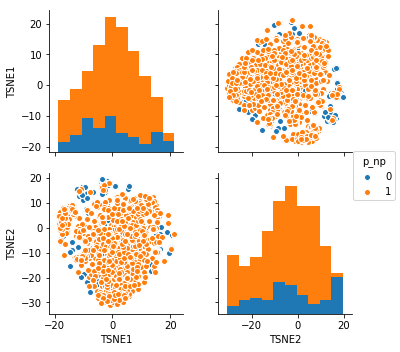

In [38]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_BBBP = model.fit_transform(X)
df['TSNE1'] = tsne_BBBP.T[0]
df['TSNE2'] = tsne_BBBP.T[1]
sns.pairplot(df, hue='p_np', vars=['TSNE1', 'TSNE2']);

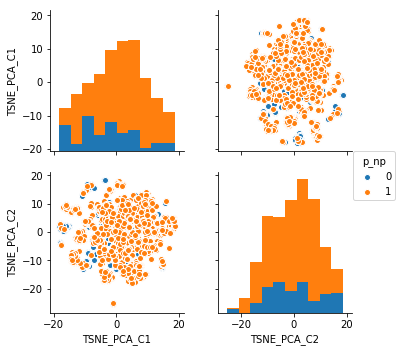

In [39]:
pca_model = PCA(n_components=30, random_state=0)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_pca_BBBP = tsne_model.fit_transform(pca_model.fit_transform(X))
df['TSNE_PCA_C1'] = tsne_pca_BBBP.T[0]
df['TSNE_PCA_C2'] = tsne_pca_BBBP.T[1]
sns.pairplot(df, hue='p_np', vars=['TSNE_PCA_C1', 'TSNE_PCA_C2']);

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [45]:
def find_best_classy(clf_params, train=[X_train, y_train], test=[X_test, y_test]):
    f1 = 0
    best = 0
    for clf, param in clf_params:
        random_search = RandomizedSearchCV(clf, param_distributions=param)
        random_search.fit(train[0], train[1])
        if f1 < f1_score(test[1], random_search.predict(test[0])):
            best = random_search
    print(best.best_estimator_)
    print(best.best_params_)
    print(classification_report(test[1], best.predict(test[0])))
    return best

forest = {"max_depth": [3, None],
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "max_depth":randint(1,1000),
              "warm_start":[True ,False]
         }
dtree = {
    "min_samples_leaf": randint(1, 11),
    "criterion": ["gini", "entropy"],
    "max_depth":randint(1,1000), 
}
knn = {
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"], 
    "n_neighbors":randint(1,20), 
    "weights":["uniform", "distance"], 
    "leaf_size":randint(5,50)   
}
mlp = {
    "activation":["identity", "logistic", "tanh", "relu"], 
    "solver":["lbfgs", "sgd", "adam"], 
    "learning_rate":["constant", "invscaling", "adaptive"], 
    "hidden_layer_sizes":randint(1,99), 
    "alpha":uniform(0.000001, .01), 
    "power_t":uniform(0.1, .9), 
    "momentum":uniform(0.0, 1.0)
}
svc = {
    "kernel":["rbf", "linear", "sigmoid"],
    "probability":[True, False],
    "shrinking":[True, False], 
    "C":uniform(0.1, 1.0)  
}
clf_params = [[RandomForestClassifier(), forest],
              [DecisionTreeClassifier(), dtree], 
              [KNeighborsClassifier(), knn], [SVC(), svc], 
              [MLPClassifier(), mlp]]


In [47]:

pca_features = pd.concat([df["PC1"], df["PC2"], df["PC3"]], axis=1)
tsne_full = pd.concat([df["TSNE1"], df["TSNE2"]], axis=1)
tsne_scaled = pd.concat([df["TSNE_PCA_C1"], df["TSNE_PCA_C2"]], axis=1)
fp = df["FP"]
labels = df["p_np"]
data = [fp, pca_features, tsne_full, tsne_scaled]
for features in data:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)
    find_best_classy(clf_params=clf_params)

MLPClassifier(activation='logistic', alpha=0.0091931127406896206,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=58, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200,
       momentum=0.57905396703780987, nesterovs_momentum=True,
       power_t=0.10477289956395491, random_state=None, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
{'activation': 'logistic', 'alpha': 0.0091931127406896206, 'hidden_layer_sizes': 58, 'learning_rate': 'adaptive', 'momentum': 0.57905396703780987, 'power_t': 0.10477289956395491, 'solver': 'lbfgs'}
             precision    recall  f1-score   support

          0       0.75      0.44      0.56        99
          1       0.84      0.95      0.89       309

avg / total       0.82      0.83      0.81       408

MLPClassifier(activation='tanh', alpha=0.00246067550091342, batch_size='auto',
       beta_1=0.9, 